## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

## Drive Mounting and loading the dataset

In [ ]:
drive.mount('/content/drive', True)
file = '/content/drive/MyDrive/Colab Notebooks/Dataset Valmet_sensor_data.csv'
dataset = pd.read_csv(file)

Mounted at /content/drive


## Selection of relevant columns and removal of rows with null values

In [ ]:
df = dataset[["Roughness", "Dry Weight", "Moisture 1", "Coat Weight 1", "Coat Weight 2", "Filler Flume Consistency",
                  "Dryer Control 1", "Filler Amount", "Nipload", 'Press Control', "Speed","Dryer Control 2","Water Flow"]]
df = df.dropna(subset=['Roughness'])
df =df.dropna()

## DataFrame Analysis

In [ ]:
df.describe()

,Roughness,Dry Weight,Moisture 1,Coat Weight 1,Coat Weight 2,Filler Flume Consistency,Dryer Control 1,Filler Amount,Nipload,Press Control,Speed,Dryer Control 2,Water Flow
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,3.657860,69.174169,9.423348,5.968680,1.685908,0.098323,47.581800,0.307533,231.792559,55.536431,1667.302807,50.087033,738.500532
std,0.303944,10.110085,1.141339,0.753117,0.171094,0.031903,18.319724,0.017888,55.276566,21.450434,232.103752,19.281915,94.976433
min,0.000000,0.000000,0.000000,1.652846,0.000000,0.042445,2.835565,0.300000,0.000000,3.283298,1063.992899,3.107441,420.677140
25%,3.473571,59.151266,8.522031,5.701823,1.599899,0.072574,32.551834,0.300000,187.315520,37.960929,1505.044023,34.285426,672.425233
50%,3.650000,67.410596,9.467358,5.898028,1.600664,0.096654,46.342446,0.300000,223.301063,54.072022,1661.597917,48.806091,731.336383
75%,3.830708,77.903341,10.058996,6.132483,1.753594,0.118144,61.245091,0.300000,272.310128,71.492812,1880.260849,64.471568,792.328455
max,7.600000,100.603260,23.198673,37.867449,2.599714,0.219387,98.832571,0.350000,400.876241,167.753492,2069.813343,103.988897,1516.188919


In [ ]:
corr = df.corr()
corr

,Roughness,Dry Weight,Moisture 1,Coat Weight 1,Coat Weight 2,Filler Flume Consistency,Dryer Control 1,Filler Amount,Nipload,Press Control,Speed,Dryer Control 2,Water Flow
Roughness,1.000000,-0.170588,0.027771,-0.069411,-0.093936,0.126922,-0.208931,-0.051098,-0.079537,-0.206480,0.115074,-0.209066,0.068831
Dry Weight,-0.170588,1.000000,0.295408,0.241382,0.234164,-0.636151,0.628767,0.112854,0.364605,0.626285,-0.756955,0.628818,-0.060637
Moisture 1,0.027771,0.295408,1.000000,0.138845,0.176453,-0.128587,-0.020666,0.210860,0.272101,-0.016435,-0.439920,-0.020111,-0.157514
Coat Weight 1,-0.069411,0.241382,0.138845,1.000000,0.186864,-0.190692,0.039564,0.069788,0.135265,0.037954,-0.260032,0.039565,-0.019228
Coat Weight 2,-0.093936,0.234164,0.176453,0.186864,1.000000,-0.253078,-0.008004,-0.004087,0.173195,-0.005843,-0.376733,-0.008001,-0.086058
Filler Flume Consistency,0.126922,-0.636151,-0.128587,-0.190692,-0.253078,1.000000,-0.291775,0.251501,0.000916,-0.290506,0.726235,-0.291928,-0.154390
Dryer Control 1,-0.208931,0.628767,-0.020666,0.039564,-0.008004,-0.291775,1.000000,0.198344,0.328492,0.995018,-0.222621,0.999935,-0.113239
Filler Amount,-0.051098,0.112854,0.210860,0.069788,-0.004087,0.251501,0.198344,1.000000,0.554119,0.196868,-0.039390,0.198332,-0.333946
Nipload,-0.079537,0.364605,0.272101,0.135265,0.173195,0.000916,0.328492,0.554119,1.000000,0.328790,-0.255514,0.328517,-0.276970
Press Control,-0.206480,0.626285,-0.016435,0.037954,-0.005843,-0.290506,0.995018,0.196868,0.328790,1.000000,-0.221808,0.995039,-0.112574


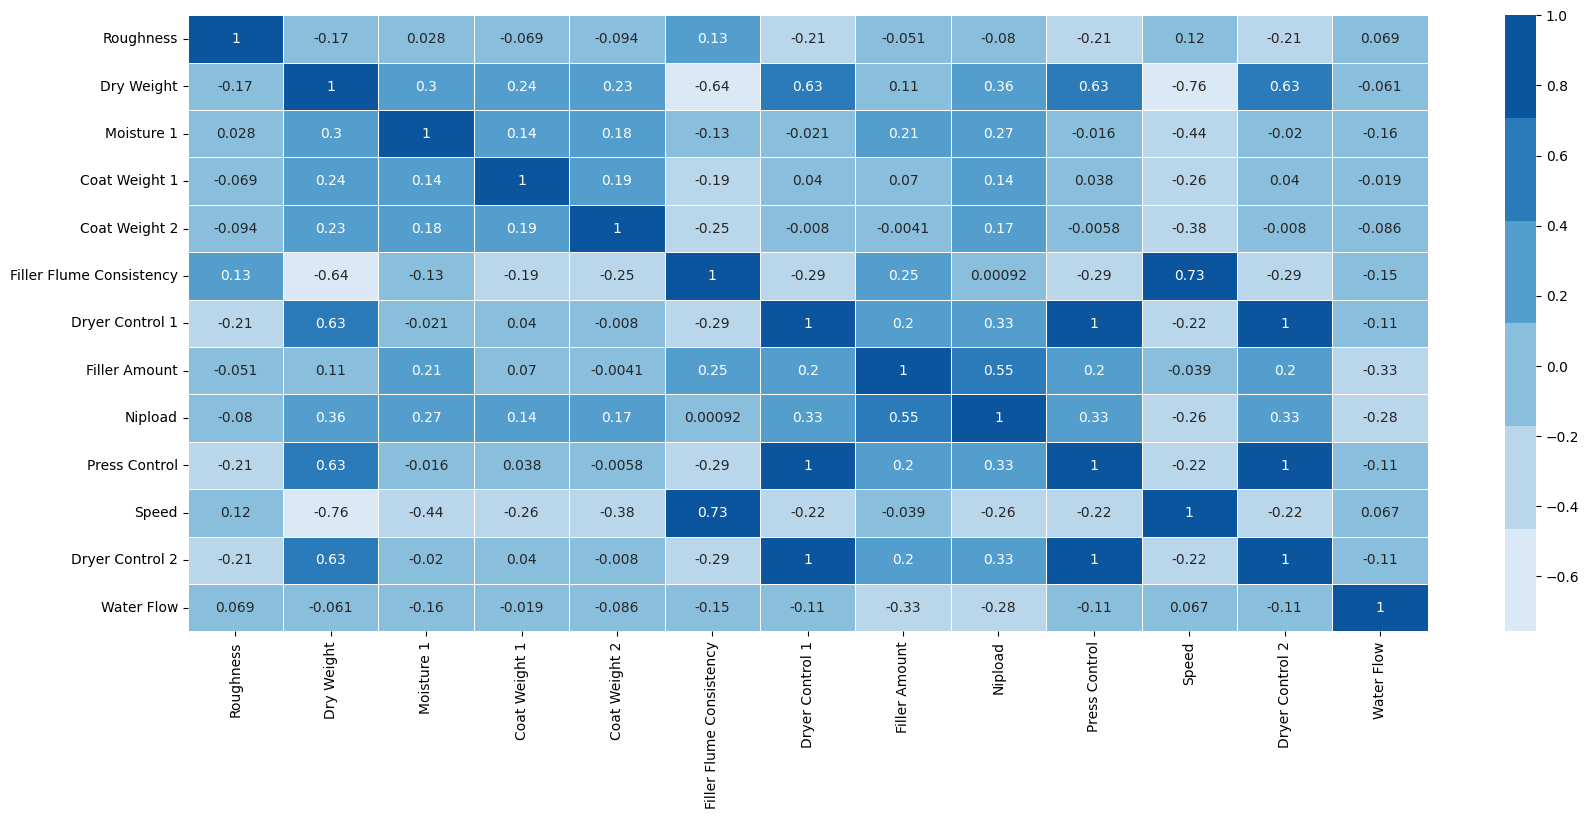

In [ ]:
corr = df.corr()
corr
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 2 to 22031
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Roughness                 5051 non-null   float64
 1   Dry Weight                5051 non-null   float64
 2   Moisture 1                5051 non-null   float64
 3   Coat Weight 1             5051 non-null   float64
 4   Coat Weight 2             5051 non-null   float64
 5   Filler Flume Consistency  5051 non-null   float64
 6   Dryer Control 1           5051 non-null   float64
 7   Filler Amount             5051 non-null   float64
 8   Nipload                   5051 non-null   float64
 9   Press Control             5051 non-null   float64
 10  Speed                     5051 non-null   float64
 11  Dryer Control 2           5051 non-null   float64
 12  Water Flow                5051 non-null   float64
dtypes: float64(13)
memory usage: 552.5 KB


In [ ]:
#Data Splitting
X = df.drop('Roughness', axis=1)
y = df['Roughness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Hyperparameter Definition for Optimization
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
#Initialization of the Random Forest Model
rf_model = RandomForestRegressor(random_state=42)

#Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

#Fitting the Best Model
best_params = grid_search.best_params_
print("best_params:", best_params)

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
#Model Evaluation
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#Printing the Results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

best_params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 0.06211370822380196
R-squared (R2): 0.2936055171324663


In [ ]:
#Feature Selection - Removing the columns that had lower correlation with 'Roughness'.
X = df.drop(['Roughness', 'Moisture 1','Coat Weight 1','Coat Weight 2','Filler Amount','Nipload','Water Flow'], axis=1)
y = df['Roughness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Hyperparameter Definition for Optimization
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
#Initialization of the Random Forest Model
rf_model = RandomForestRegressor(random_state=42)

#Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

#Fitting the Best Model
best_params = grid_search.best_params_
print("best_params:", best_params)

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
#Model Evaluation
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#Printing the Results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

best_params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error (MSE): 0.07196576433145481
R-squared (R2): 0.18156200406008938
